In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://richardson.byu.edu/220/ds_salary.csv")

##**General Salary Data**
As expected we can see that there is a higher frequency of smaller salaries.

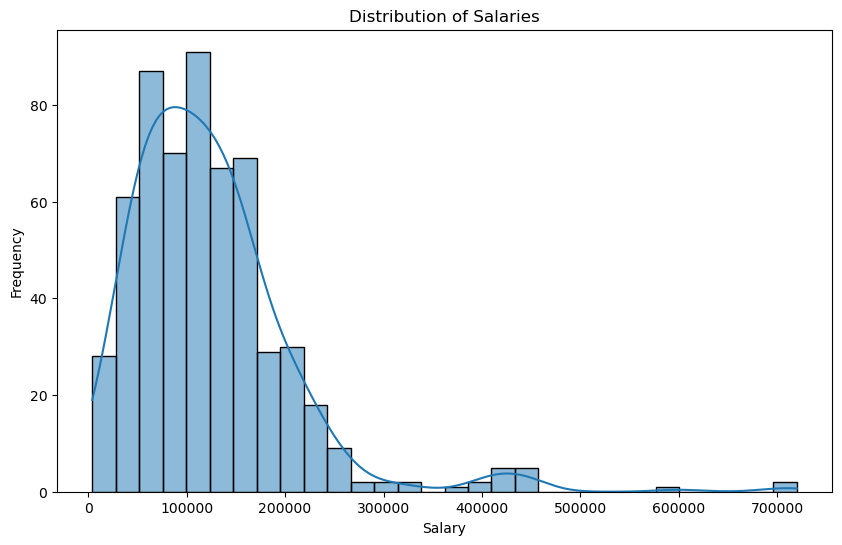

count       581.000000
mean     123685.096386
std       85286.402256
min        4000.000000
25%       67000.000000
50%      110000.000000
75%      157000.000000
max      720000.000000
Name: salary, dtype: float64

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

df['salary'].describe()

##**Impact of Experience Level on Salary**
We used a boxplot and computed the average salary of people with experience EN, EX, MI, SE and we found that generally EX has the highest average salary. It was interesting as demonstrated by the boxplot that in some of the people with the least experience were making more than the highest experience level.

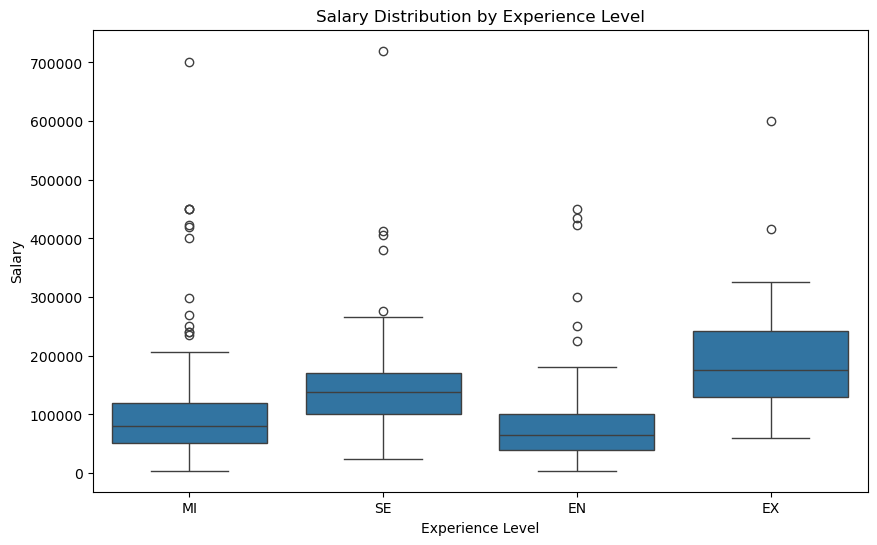

0      MI
1      SE
2      SE
3      MI
4      SE
       ..
576    SE
577    SE
578    SE
579    SE
580    MI
Name: experience_level, Length: 581, dtype: object
experience_level
EN     84397.200000
EX    204155.000000
MI    103480.437811
SE    142566.625455
Name: salary, dtype: float64


In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

print(df['experience_level'])

# Calculate the average salary for each experience level
average_salary_by_experience = df.groupby('experience_level')['salary'].mean()
print(average_salary_by_experience)


##**Impact of Company Size on Salary**
We used a boxplot and computed the average salary of small, medium, and large companies to analyze the effect that company size has on salary. It was striking that small companies on average each employee made the least amount of money but in the boxplot there were outliers who made more than even the highest paid earners in large companies. We found that on average Large had the highest average, then medium, then small.

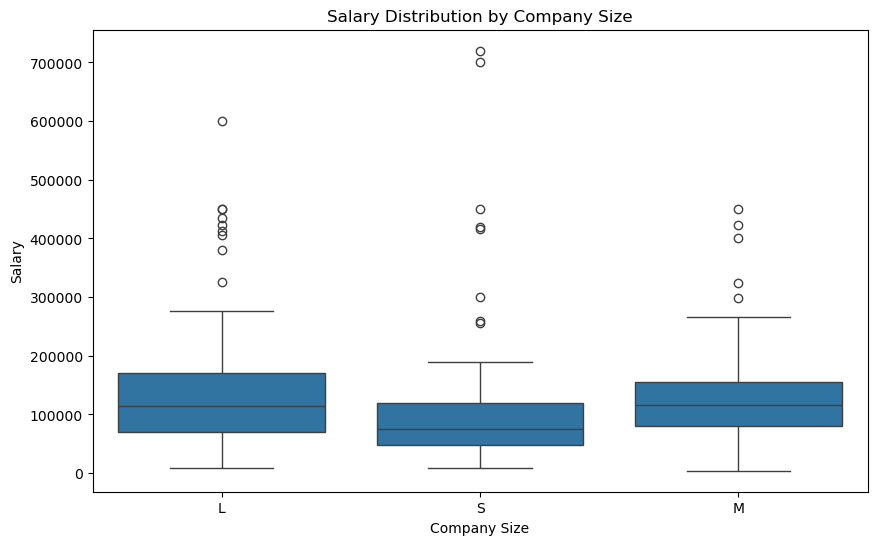

company_size
L    133405.357143
M    120767.398754
S    113011.935897
Name: salary, dtype: float64


In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary', data=df)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.show()

# Calculate the average salary for each experience level
average_salary_by_company_size = df.groupby('company_size')['salary'].mean()
print(average_salary_by_company_size)

### 4 - Job Title Analysis
From the density plots that we created, you can see a large amount of variation in the salary an employee could be making based on which word is in their name. A few remarks can be maded that directors and managers have fairly somily means, but the variance of managers are much higher, thus creating a "fatter" bell curve compared with the "skinny" bell curve. Another observation that can be made is that all of the graphs are skewed right, which makes sense because it makes more sense for people to be making less money than more money. Another observation is that "Scientists", "Engineers" and "Analysts" all seem to have fairly similar compensation graphs, all of which are less than "Managers" and "Directors". So if you want to be making the "Mr. Krabbs" kind of money, you should be a manager or a director.

In [5]:
df_scientist = df[df['job_title'].str.contains('Scientist', case=False)]
df_engineer = df[df['job_title'].str.contains('Engineer', case=False)]
df_analyst = df[df['job_title'].str.contains('Analyst', case=False)]
df_manager = df[df['job_title'].str.contains('Manager', case=False)]
df_director = df[df['job_title'].str.contains('Director', case=False)]

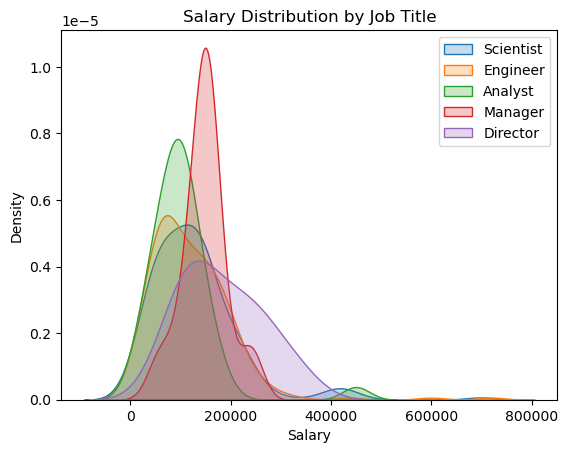

In [6]:
sns.kdeplot(df_scientist['salary'], label='Scientist', fill=True)
sns.kdeplot(df_engineer['salary'], label='Engineer', fill=True)
sns.kdeplot(df_analyst['salary'], label='Analyst', fill=True)
sns.kdeplot(df_manager['salary'], label='Manager', fill=True)
sns.kdeplot(df_director['salary'], label='Director', fill=True)

plt.title('Salary Distribution by Job Title')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

5 - Interactions Between Relationships
This chart shows salary at the intersections of company size and experience level. Some interesting finds include that entry level employees have a higher median salary at small companies than midsized companies. This was also true for senior level positions. As most people would expect, the highest median salary belongs to executives at large companies.

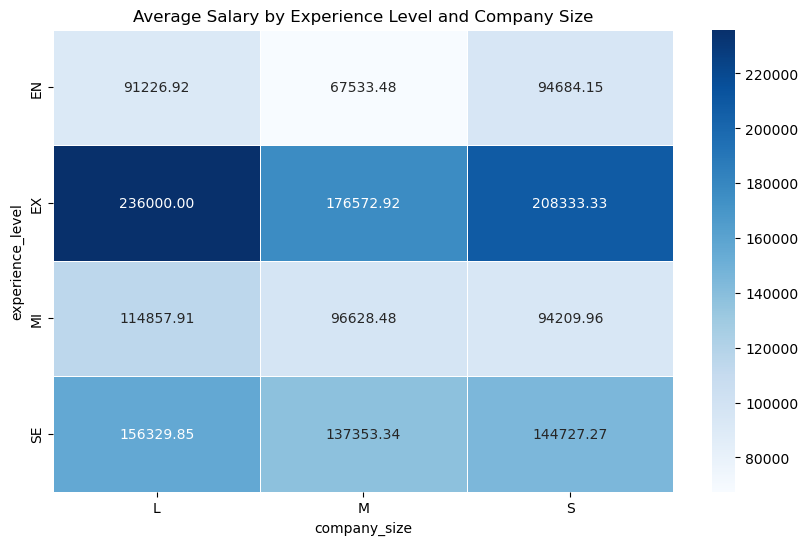

In [7]:
multi_way_table_1 = pd.pivot_table(df, values='salary', index='experience_level', columns='company_size', aggfunc='mean')
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.heatmap(multi_way_table_1, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title('Average Salary by Experience Level and Company Size')
plt.show()

###**Conclusion**
It is observable that salaries tend to be higher the larger a company is. We also were able to observe through our analyses that increases in experience are related to increases in salary. Due to our analysis of job titles related to median salaries, it seems that management focused positions make more money than technically focused positions such as scientists and engineers. It was also observed that almost all of the data collected shows people have salaries most commonly between 0 and 250,000 dollars per year.